In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

concat([df1,df2]) 等价于 df1.append(df2)

# 数据合并
- 数据合并的代码，耗时较久，已经完成执行并输出

In [2]:
# train_path = r"D:\dataset\智慧海洋\hy_round1_train_20200102\hy_round1_train_20200102"
# test_path = r"D:\dataset\智慧海洋\hy_round1_testA_20200102\hy_round1_testA_20200102"

# train_df = pd.DataFrame()
# len_train = len(os.listdir(train_path))
# for index, tp in enumerate(os.listdir(train_path)):
#     print("{}/{}".format(index+1, len_train))
#     file_path = os.path.join(train_path, tp)
#     df_read = pd.read_csv(file_path)
#     train_df = train_df.append(df_read)

# train_df.shape  # (2699638, 7)

# test_df = pd.DataFrame()
# len_test = len(os.listdir(test_path))
# for index, tp in enumerate(os.listdir(test_path)):
#     print("{}/{}".format(index+1, len_test))
#     file_path = os.path.join(test_path, tp)
#     df_read = pd.read_csv(file_path)
#     test_df = test_df.append(df_read)

# test_df.shape  # (782378, 6)

# train_df.to_csv(r"D:\dataset\智慧海洋\train.csv")
# test_df.to_csv(r"D:\dataset\智慧海洋\test.csv")

# 导入数据

In [3]:
train_df = pd.read_csv(r"D:\dataset\智慧海洋\train.csv")
# train_df = pd.read_csv("/Users/nick/Documents/dataset/智慧海洋/train.csv")


print(train_df.shape)
train_df.head()

(2699638, 8)


,Unnamed: 0,渔船ID,x,y,速度,方向,time,type
0,0,0,6.152038e+06,5.124873e+06,2.59,102,1110 11:58:19,拖网
1,1,0,6.151230e+06,5.125218e+06,2.70,113,1110 11:48:19,拖网
2,2,0,6.150421e+06,5.125563e+06,2.70,116,1110 11:38:19,拖网
3,3,0,6.149612e+06,5.125907e+06,3.29,95,1110 11:28:19,拖网
4,4,0,6.148803e+06,5.126252e+06,3.18,108,1110 11:18:19,拖网


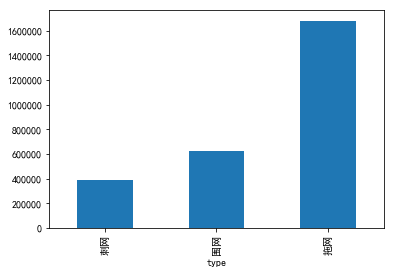

In [4]:
train_df.groupby("type")["type"].count().plot.bar()

In [5]:
test_df = pd.read_csv(r"D:\dataset\智慧海洋\test.csv")
# test_df = pd.read_csv("/Users/nick/Documents/dataset/智慧海洋/test.csv")
print(test_df.shape)
test_df.head()

(782378, 7)


,Unnamed: 0,渔船ID,x,y,速度,方向,time
0,0,7000,7.118845e+06,5.918277e+06,0.11,0,1103 11:54:32
1,1,7000,7.118940e+06,5.918285e+06,0.32,346,1103 11:44:32
2,2,7000,7.118948e+06,5.918174e+06,0.11,0,1103 11:34:43
3,3,7000,7.118948e+06,5.918174e+06,0.11,71,1103 11:14:30
4,4,7000,7.118948e+06,5.918174e+06,0.11,30,1103 11:04:46


In [6]:
train_df["record"] = "train"
test_df["record"] = "test"

In [7]:
df = pd.concat([train_df, test_df], axis=0)
print(df.shape)
df.head()

d:\python_install\venv_set\py353\dataanalysiscase\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(3482016, 9)


,Unnamed: 0,record,time,type,x,y,方向,渔船ID,速度
0,0,train,1110 11:58:19,拖网,6.152038e+06,5.124873e+06,102,0,2.59
1,1,train,1110 11:48:19,拖网,6.151230e+06,5.125218e+06,113,0,2.70
2,2,train,1110 11:38:19,拖网,6.150421e+06,5.125563e+06,116,0,2.70
3,3,train,1110 11:28:19,拖网,6.149612e+06,5.125907e+06,95,0,3.29
4,4,train,1110 11:18:19,拖网,6.148803e+06,5.126252e+06,108,0,3.18


In [8]:
type_list = ["拖网", "围网", "刺网"]

In [9]:
# 生成箱线图
def draw_box(df_data, x_col, y_col=None):
    plt.subplots(figsize=(10, 6))
    if y_col:
        fig = sns.boxplot(x=df_data[y_col], y=x_col, data=df_data)
    else:
        fig = sns.boxplot(x=None, y=x_col, data=df_data)
    plt.xlabel(y_col, fontdict={'weight': 'normal', 'size': 24})
    plt.ylabel(x_col, fontdict={'weight': 'normal', 'size': 24})
    plt.yticks(size=18)
    plt.xticks(size=18)
    fig.axis()
    plt.show()

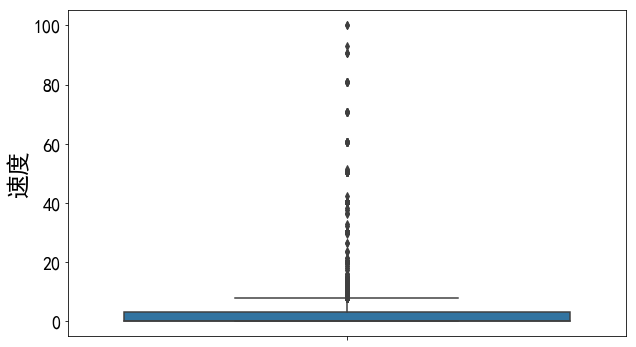

In [10]:
draw_box(df, x_col="速度", y_col=None)

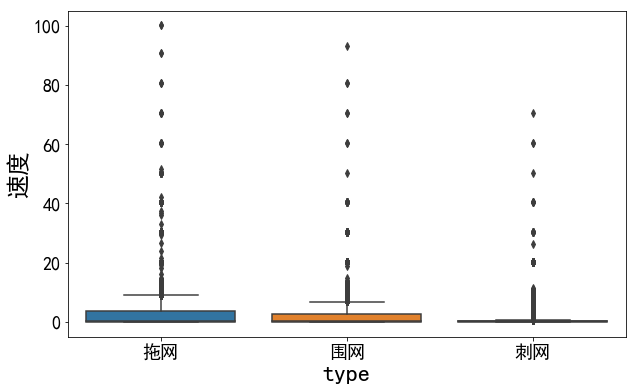

In [11]:
draw_box(df, x_col="速度", y_col="type")

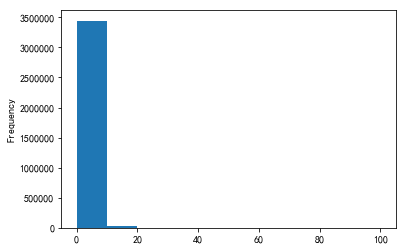

In [12]:
df["速度"].plot.hist()

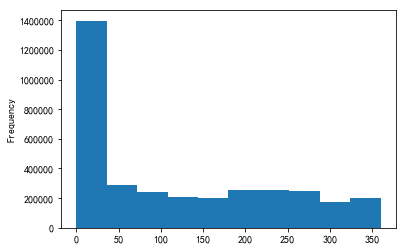

In [13]:
df["方向"].plot.hist()

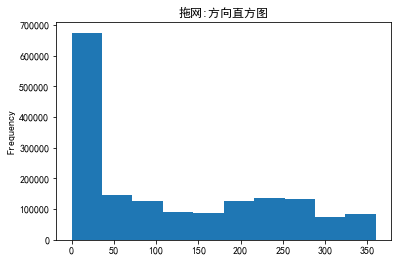

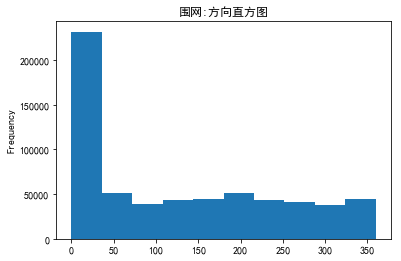

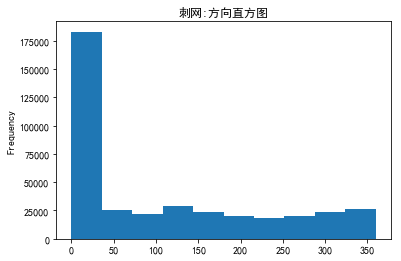

In [14]:
for tl in type_list:
    df[df["type"]==tl]["方向"].plot.hist(title="{}:方向直方图".format(tl))
    plt.show()

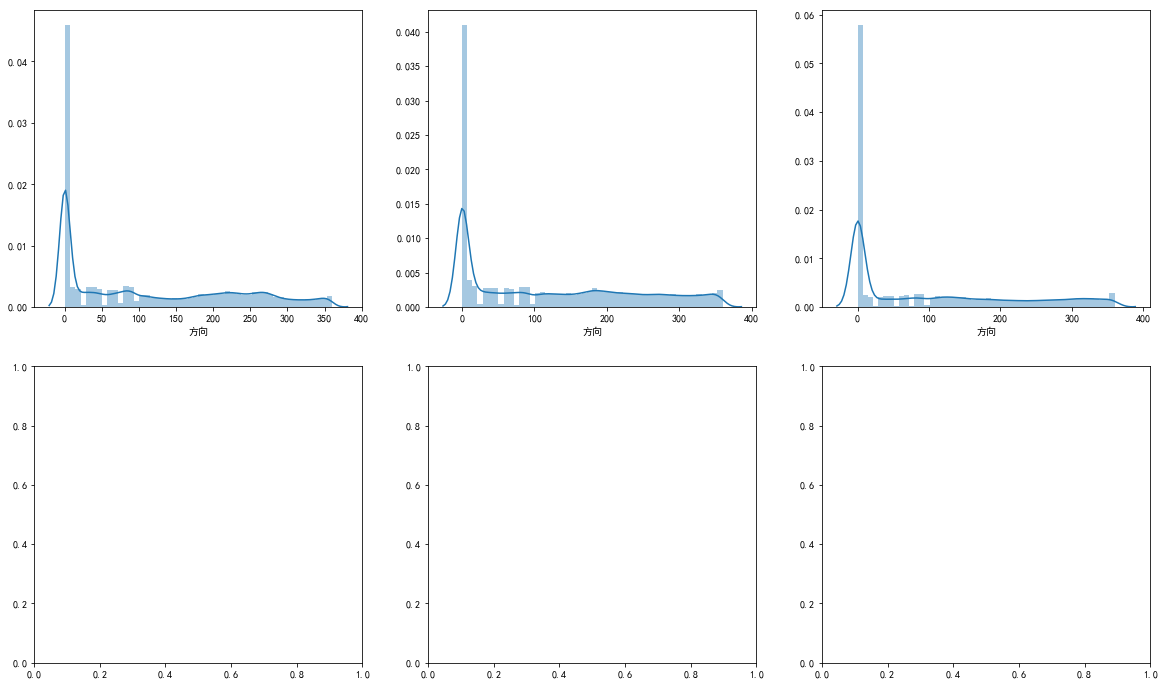

In [15]:
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
for index, tl in enumerate(type_list):
    sns.distplot(df[df["type"]==tl]["方向"],ax=axes[0][index])

In [16]:
# 查看缺失值
df.isnull().sum(axis=0)

Unnamed: 0         0
record             0
time               0
type          782378
x                  0
y                  0
方向                 0
渔船ID               0
速度                 0
dtype: int64

In [17]:
train_df.head()

,Unnamed: 0,渔船ID,x,y,速度,方向,time,type,record
0,0,0,6.152038e+06,5.124873e+06,2.59,102,1110 11:58:19,拖网,train
1,1,0,6.151230e+06,5.125218e+06,2.70,113,1110 11:48:19,拖网,train
2,2,0,6.150421e+06,5.125563e+06,2.70,116,1110 11:38:19,拖网,train
3,3,0,6.149612e+06,5.125907e+06,3.29,95,1110 11:28:19,拖网,train
4,4,0,6.148803e+06,5.126252e+06,3.18,108,1110 11:18:19,拖网,train


In [18]:
test_df.head()

,Unnamed: 0,渔船ID,x,y,速度,方向,time,record
0,0,7000,7.118845e+06,5.918277e+06,0.11,0,1103 11:54:32,test
1,1,7000,7.118940e+06,5.918285e+06,0.32,346,1103 11:44:32,test
2,2,7000,7.118948e+06,5.918174e+06,0.11,0,1103 11:34:43,test
3,3,7000,7.118948e+06,5.918174e+06,0.11,71,1103 11:14:30,test
4,4,7000,7.118948e+06,5.918174e+06,0.11,30,1103 11:04:46,test


In [19]:
train_df = train_df.drop(["Unnamed: 0"], axis=1)

In [20]:
train_df.head()

,渔船ID,x,y,速度,方向,time,type,record
0,0,6.152038e+06,5.124873e+06,2.59,102,1110 11:58:19,拖网,train
1,0,6.151230e+06,5.125218e+06,2.70,113,1110 11:48:19,拖网,train
2,0,6.150421e+06,5.125563e+06,2.70,116,1110 11:38:19,拖网,train
3,0,6.149612e+06,5.125907e+06,3.29,95,1110 11:28:19,拖网,train
4,0,6.148803e+06,5.126252e+06,3.18,108,1110 11:18:19,拖网,train


In [21]:
idgy = train_df.groupby("渔船ID")["渔船ID"].count()
idgy.shape

(7000,)

In [23]:
df = pd.DataFrame()


id_list = []
data_list = []
record_list = []
type_list = []
for i in range(idgy.shape[0]):
    print("{}/{}".format(i, idgy.shape[0]))
    item = []
    record_0 = None
    type_0 = None
    
    iddf = train_df[train_df["渔船ID"] == i]
    for j in range(iddf.shape[0]):
        data_dict = iddf.iloc[j].to_dict()
        if j == 0:
            id_0 = data_dict["渔船ID"]
            record_0 = data_dict["record"]
            type_0 = data_dict["type"]
        data = [data_dict["x"], data_dict["y"], data_dict["方向"], data_dict["速度"]]
        item.append(data)
    
    data_list.append(item)
    id_list.append(id_0)
    record_list.append(record_0)
    type_list.append(type_0)

df["id"] = id_list
df["data"] = data_list
df["record"] = record_list
df["type"] = type_list

0/7000
1/7000
2/7000
3/7000
4/7000
5/7000
6/7000
7/7000
8/7000
9/7000
10/7000
11/7000
12/7000
13/7000
14/7000
15/7000
16/7000
17/7000
18/7000
19/7000
20/7000
21/7000
22/7000
23/7000
24/7000
25/7000
26/7000
27/7000
28/7000
29/7000
30/7000
31/7000
32/7000
33/7000
34/7000
35/7000
36/7000
37/7000
38/7000
39/7000
40/7000
41/7000
42/7000
43/7000
44/7000
45/7000
46/7000
47/7000
48/7000
49/7000
50/7000
51/7000
52/7000
53/7000
54/7000
55/7000
56/7000
57/7000
58/7000
59/7000
60/7000
61/7000
62/7000
63/7000
64/7000
65/7000
66/7000
67/7000
68/7000
69/7000
70/7000
71/7000
72/7000
73/7000
74/7000
75/7000
76/7000
77/7000
78/7000
79/7000
80/7000
81/7000
82/7000
83/7000
84/7000
85/7000
86/7000
87/7000
88/7000
89/7000
90/7000
91/7000
92/7000
93/7000
94/7000
95/7000
96/7000
97/7000
98/7000
99/7000
100/7000
101/7000
102/7000
103/7000
104/7000
105/7000
106/7000
107/7000
108/7000
109/7000
110/7000
111/7000
112/7000
113/7000
114/7000
115/7000
116/7000
117/7000
118/7000
119/7000
120/7000
121/7000
122/7000
123

923/7000
924/7000
925/7000
926/7000
927/7000
928/7000
929/7000
930/7000
931/7000
932/7000
933/7000
934/7000
935/7000
936/7000
937/7000
938/7000
939/7000
940/7000
941/7000
942/7000
943/7000
944/7000
945/7000
946/7000
947/7000
948/7000
949/7000
950/7000
951/7000
952/7000
953/7000
954/7000
955/7000
956/7000
957/7000
958/7000
959/7000
960/7000
961/7000
962/7000
963/7000
964/7000
965/7000
966/7000
967/7000
968/7000
969/7000
970/7000
971/7000
972/7000
973/7000
974/7000
975/7000
976/7000
977/7000
978/7000
979/7000
980/7000
981/7000
982/7000
983/7000
984/7000
985/7000
986/7000
987/7000
988/7000
989/7000
990/7000
991/7000
992/7000
993/7000
994/7000
995/7000
996/7000
997/7000
998/7000
999/7000
1000/7000
1001/7000
1002/7000
1003/7000
1004/7000
1005/7000
1006/7000
1007/7000
1008/7000
1009/7000
1010/7000
1011/7000
1012/7000
1013/7000
1014/7000
1015/7000
1016/7000
1017/7000
1018/7000
1019/7000
1020/7000
1021/7000
1022/7000
1023/7000
1024/7000
1025/7000
1026/7000
1027/7000
1028/7000
1029/7000
1030/70

1750/7000
1751/7000
1752/7000
1753/7000
1754/7000
1755/7000
1756/7000
1757/7000
1758/7000
1759/7000
1760/7000
1761/7000
1762/7000
1763/7000
1764/7000
1765/7000
1766/7000
1767/7000
1768/7000
1769/7000
1770/7000
1771/7000
1772/7000
1773/7000
1774/7000
1775/7000
1776/7000
1777/7000
1778/7000
1779/7000
1780/7000
1781/7000
1782/7000
1783/7000
1784/7000
1785/7000
1786/7000
1787/7000
1788/7000
1789/7000
1790/7000
1791/7000
1792/7000
1793/7000
1794/7000
1795/7000
1796/7000
1797/7000
1798/7000
1799/7000
1800/7000
1801/7000
1802/7000
1803/7000
1804/7000
1805/7000
1806/7000
1807/7000
1808/7000
1809/7000
1810/7000
1811/7000
1812/7000
1813/7000
1814/7000
1815/7000
1816/7000
1817/7000
1818/7000
1819/7000
1820/7000
1821/7000
1822/7000
1823/7000
1824/7000
1825/7000
1826/7000
1827/7000
1828/7000
1829/7000
1830/7000
1831/7000
1832/7000
1833/7000
1834/7000
1835/7000
1836/7000
1837/7000
1838/7000
1839/7000
1840/7000
1841/7000
1842/7000
1843/7000
1844/7000
1845/7000
1846/7000
1847/7000
1848/7000
1849/7000


2570/7000
2571/7000
2572/7000
2573/7000
2574/7000
2575/7000
2576/7000
2577/7000
2578/7000
2579/7000
2580/7000
2581/7000
2582/7000
2583/7000
2584/7000
2585/7000
2586/7000
2587/7000
2588/7000
2589/7000
2590/7000
2591/7000
2592/7000
2593/7000
2594/7000
2595/7000
2596/7000
2597/7000
2598/7000
2599/7000
2600/7000
2601/7000
2602/7000
2603/7000
2604/7000
2605/7000
2606/7000
2607/7000
2608/7000
2609/7000
2610/7000
2611/7000
2612/7000
2613/7000
2614/7000
2615/7000
2616/7000
2617/7000
2618/7000
2619/7000
2620/7000
2621/7000
2622/7000
2623/7000
2624/7000
2625/7000
2626/7000
2627/7000
2628/7000
2629/7000
2630/7000
2631/7000
2632/7000
2633/7000
2634/7000
2635/7000
2636/7000
2637/7000
2638/7000
2639/7000
2640/7000
2641/7000
2642/7000
2643/7000
2644/7000
2645/7000
2646/7000
2647/7000
2648/7000
2649/7000
2650/7000
2651/7000
2652/7000
2653/7000
2654/7000
2655/7000
2656/7000
2657/7000
2658/7000
2659/7000
2660/7000
2661/7000
2662/7000
2663/7000
2664/7000
2665/7000
2666/7000
2667/7000
2668/7000
2669/7000


3390/7000
3391/7000
3392/7000
3393/7000
3394/7000
3395/7000
3396/7000
3397/7000
3398/7000
3399/7000
3400/7000
3401/7000
3402/7000
3403/7000
3404/7000
3405/7000
3406/7000
3407/7000
3408/7000
3409/7000
3410/7000
3411/7000
3412/7000
3413/7000
3414/7000
3415/7000
3416/7000
3417/7000
3418/7000
3419/7000
3420/7000
3421/7000
3422/7000
3423/7000
3424/7000
3425/7000
3426/7000
3427/7000
3428/7000
3429/7000
3430/7000
3431/7000
3432/7000
3433/7000
3434/7000
3435/7000
3436/7000
3437/7000
3438/7000
3439/7000
3440/7000
3441/7000
3442/7000
3443/7000
3444/7000
3445/7000
3446/7000
3447/7000
3448/7000
3449/7000
3450/7000
3451/7000
3452/7000
3453/7000
3454/7000
3455/7000
3456/7000
3457/7000
3458/7000
3459/7000
3460/7000
3461/7000
3462/7000
3463/7000
3464/7000
3465/7000
3466/7000
3467/7000
3468/7000
3469/7000
3470/7000
3471/7000
3472/7000
3473/7000
3474/7000
3475/7000
3476/7000
3477/7000
3478/7000
3479/7000
3480/7000
3481/7000
3482/7000
3483/7000
3484/7000
3485/7000
3486/7000
3487/7000
3488/7000
3489/7000


4211/7000
4212/7000
4213/7000
4214/7000
4215/7000
4216/7000
4217/7000
4218/7000
4219/7000
4220/7000
4221/7000
4222/7000
4223/7000
4224/7000
4225/7000
4226/7000
4227/7000
4228/7000
4229/7000
4230/7000
4231/7000
4232/7000
4233/7000
4234/7000
4235/7000
4236/7000
4237/7000
4238/7000
4239/7000
4240/7000
4241/7000
4242/7000
4243/7000
4244/7000
4245/7000
4246/7000
4247/7000
4248/7000
4249/7000
4250/7000
4251/7000
4252/7000
4253/7000
4254/7000
4255/7000
4256/7000
4257/7000
4258/7000
4259/7000
4260/7000
4261/7000
4262/7000
4263/7000
4264/7000
4265/7000
4266/7000
4267/7000
4268/7000
4269/7000
4270/7000
4271/7000
4272/7000
4273/7000
4274/7000
4275/7000
4276/7000
4277/7000
4278/7000
4279/7000
4280/7000
4281/7000
4282/7000
4283/7000
4284/7000
4285/7000
4286/7000
4287/7000
4288/7000
4289/7000
4290/7000
4291/7000
4292/7000
4293/7000
4294/7000
4295/7000
4296/7000
4297/7000
4298/7000
4299/7000
4300/7000
4301/7000
4302/7000
4303/7000
4304/7000
4305/7000
4306/7000
4307/7000
4308/7000
4309/7000
4310/7000


5033/7000
5034/7000
5035/7000
5036/7000
5037/7000
5038/7000
5039/7000
5040/7000
5041/7000
5042/7000
5043/7000
5044/7000
5045/7000
5046/7000
5047/7000
5048/7000
5049/7000
5050/7000
5051/7000
5052/7000
5053/7000
5054/7000
5055/7000
5056/7000
5057/7000
5058/7000
5059/7000
5060/7000
5061/7000
5062/7000
5063/7000
5064/7000
5065/7000
5066/7000
5067/7000
5068/7000
5069/7000
5070/7000
5071/7000
5072/7000
5073/7000
5074/7000
5075/7000
5076/7000
5077/7000
5078/7000
5079/7000
5080/7000
5081/7000
5082/7000
5083/7000
5084/7000
5085/7000
5086/7000
5087/7000
5088/7000
5089/7000
5090/7000
5091/7000
5092/7000
5093/7000
5094/7000
5095/7000
5096/7000
5097/7000
5098/7000
5099/7000
5100/7000
5101/7000
5102/7000
5103/7000
5104/7000
5105/7000
5106/7000
5107/7000
5108/7000
5109/7000
5110/7000
5111/7000
5112/7000
5113/7000
5114/7000
5115/7000
5116/7000
5117/7000
5118/7000
5119/7000
5120/7000
5121/7000
5122/7000
5123/7000
5124/7000
5125/7000
5126/7000
5127/7000
5128/7000
5129/7000
5130/7000
5131/7000
5132/7000


5854/7000
5855/7000
5856/7000
5857/7000
5858/7000
5859/7000
5860/7000
5861/7000
5862/7000
5863/7000
5864/7000
5865/7000
5866/7000
5867/7000
5868/7000
5869/7000
5870/7000
5871/7000
5872/7000
5873/7000
5874/7000
5875/7000
5876/7000
5877/7000
5878/7000
5879/7000
5880/7000
5881/7000
5882/7000
5883/7000
5884/7000
5885/7000
5886/7000
5887/7000
5888/7000
5889/7000
5890/7000
5891/7000
5892/7000
5893/7000
5894/7000
5895/7000
5896/7000
5897/7000
5898/7000
5899/7000
5900/7000
5901/7000
5902/7000
5903/7000
5904/7000
5905/7000
5906/7000
5907/7000
5908/7000
5909/7000
5910/7000
5911/7000
5912/7000
5913/7000
5914/7000
5915/7000
5916/7000
5917/7000
5918/7000
5919/7000
5920/7000
5921/7000
5922/7000
5923/7000
5924/7000
5925/7000
5926/7000
5927/7000
5928/7000
5929/7000
5930/7000
5931/7000
5932/7000
5933/7000
5934/7000
5935/7000
5936/7000
5937/7000
5938/7000
5939/7000
5940/7000
5941/7000
5942/7000
5943/7000
5944/7000
5945/7000
5946/7000
5947/7000
5948/7000
5949/7000
5950/7000
5951/7000
5952/7000
5953/7000


6674/7000
6675/7000
6676/7000
6677/7000
6678/7000
6679/7000
6680/7000
6681/7000
6682/7000
6683/7000
6684/7000
6685/7000
6686/7000
6687/7000
6688/7000
6689/7000
6690/7000
6691/7000
6692/7000
6693/7000
6694/7000
6695/7000
6696/7000
6697/7000
6698/7000
6699/7000
6700/7000
6701/7000
6702/7000
6703/7000
6704/7000
6705/7000
6706/7000
6707/7000
6708/7000
6709/7000
6710/7000
6711/7000
6712/7000
6713/7000
6714/7000
6715/7000
6716/7000
6717/7000
6718/7000
6719/7000
6720/7000
6721/7000
6722/7000
6723/7000
6724/7000
6725/7000
6726/7000
6727/7000
6728/7000
6729/7000
6730/7000
6731/7000
6732/7000
6733/7000
6734/7000
6735/7000
6736/7000
6737/7000
6738/7000
6739/7000
6740/7000
6741/7000
6742/7000
6743/7000
6744/7000
6745/7000
6746/7000
6747/7000
6748/7000
6749/7000
6750/7000
6751/7000
6752/7000
6753/7000
6754/7000
6755/7000
6756/7000
6757/7000
6758/7000
6759/7000
6760/7000
6761/7000
6762/7000
6763/7000
6764/7000
6765/7000
6766/7000
6767/7000
6768/7000
6769/7000
6770/7000
6771/7000
6772/7000
6773/7000
